In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("./AB_NYC_2019.csv")

In [5]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
temp=pd.DataFrame(index=df.columns)
temp["datatype"]=df.dtypes
temp["not null values"]=df.count()
temp["null value"]=df.isnull().sum()
temp["% of the null value"]=df.isnull().mean()
temp["unique count"]=df.nunique()
temp

,datatype,not null values,null value,% of the null value,unique count
id,int64,48895,0,0.000000,48895
name,object,48879,16,0.000327,47905
host_id,int64,48895,0,0.000000,37457
host_name,object,48874,21,0.000429,11452
neighbourhood_group,object,48895,0,0.000000,5
neighbourhood,object,48895,0,0.000000,221
latitude,float64,48895,0,0.000000,19048
longitude,float64,48895,0,0.000000,14718
room_type,object,48895,0,0.000000,3
price,int64,48895,0,0.000000,674


since the null values in the host name column contribute to only 0.000429	% of the total entries in the dataset. It is ideal to remove those entries from the dataset

In [10]:
df.shape

(48895, 16)

In [11]:
df=df[df["name"].notna()]

In [12]:
df.drop(['host_name'],axis=1,inplace=True)

In [13]:
df.drop(['last_review'],axis=1,inplace=True)

In [14]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
df[df.duplicated()]


,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


As there are no duplicate values in the dataset we are not removing any entries from the dataset.

In [16]:
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


The last review column contains date in object datatype, so we convert the data type of the last review column to the 'datetime' datatype

In [17]:
df['reviews_per_month'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48879 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48879 non-null  int64  
 3   neighbourhood_group             48879 non-null  object 
 4   neighbourhood                   48879 non-null  object 
 5   latitude                        48879 non-null  float64
 6   longitude                       48879 non-null  float64
 7   room_type                       48879 non-null  object 
 8   price                           48879 non-null  int64  
 9   minimum_nights                  48879 non-null  int64  
 10  number_of_reviews               48879 non-null  int64  
 11  reviews_per_month               48879 non-null  float64
 12  calculated_host_listings_count  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48879 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48879 non-null  int64  
 3   neighbourhood_group             48879 non-null  object 
 4   neighbourhood                   48879 non-null  object 
 5   latitude                        48879 non-null  float64
 6   longitude                       48879 non-null  float64
 7   room_type                       48879 non-null  object 
 8   price                           48879 non-null  int64  
 9   minimum_nights                  48879 non-null  int64  
 10  number_of_reviews               48879 non-null  int64  
 11  reviews_per_month               48879 non-null  float64
 12  calculated_host_listings_count  

In our dataset we have host id which is unique and also the host name does not play an important role in predicting the values. Therefore we can drop the host name column

In [19]:
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


Checking the number of unique values in the column room type.

In [20]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [21]:
df=pd.get_dummies(df,columns=['room_type','neighbourhood_group'])

In [22]:
df

,id,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Clean & quiet apt home by the park,2787,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,0.00,2,9,0,1,0,0,1,0,0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Bushwick,40.70184,-73.93317,40,4,0,0.00,2,36,0,1,0,0,1,0,0,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Harlem,40.81475,-73.94867,115,10,0,0.00,1,27,1,0,0,0,0,1,0,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Hell's Kitchen,40.75751,-73.99112,55,1,0,0.00,6,2,0,0,1,0,0,1,0,0


In [23]:
df=df.replace({True:1,False:0})

In [24]:
df

,id,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Clean & quiet apt home by the park,2787,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,0.00,2,9,0,1,0,0,1,0,0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Bushwick,40.70184,-73.93317,40,4,0,0.00,2,36,0,1,0,0,1,0,0,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Harlem,40.81475,-73.94867,115,10,0,0.00,1,27,1,0,0,0,0,1,0,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Hell's Kitchen,40.75751,-73.99112,55,1,0,0.00,6,2,0,0,1,0,0,1,0,0


In [25]:
df.to_excel('dfAfterPrePro.xlsx', index=False)

 Data Visualzation

viewing the distribution of the hotels in new york


In [26]:
b_img=plt.imread('./New_York_City_1j.jpg')

fig, ax = plt.subplots()
ax.scatter(df['longitude'],df['latitude'],s=0.5)

ax.imshow(b_img, extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(), df['latitude'].max()])

plt.show()

FileNotFoundError: ignored

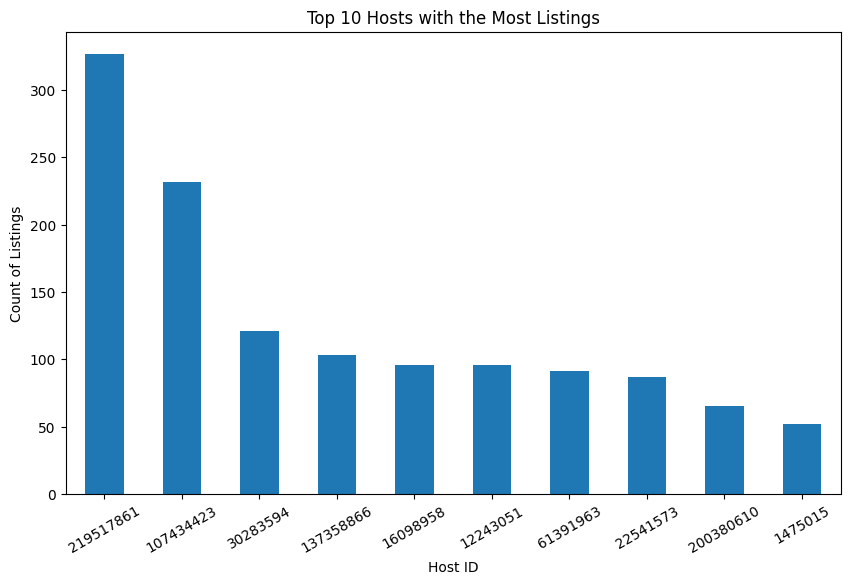

In [27]:
# histogram for the top 10 hosts with the most listings
host_counts = df['host_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
host_counts.plot(kind='bar')
plt.title('Top 10 Hosts with the Most Listings')
plt.xlabel('Host ID')
plt.ylabel('Count of Listings')
plt.xticks(rotation=30)
plt.show()

Percentage of different room types.

<Figure size 1000x600 with 0 Axes>

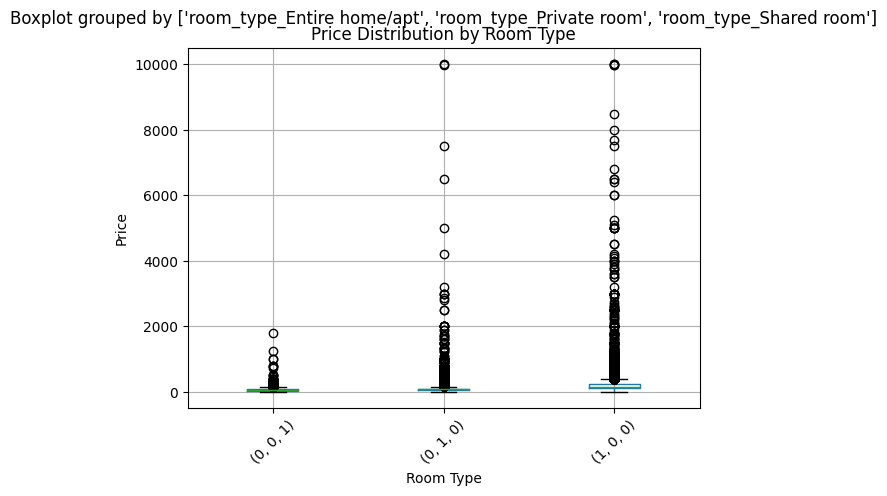

In [28]:
# box plot for price distribution by room type
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by=['room_type_Entire home/apt','room_type_Private room','room_type_Shared room'])
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

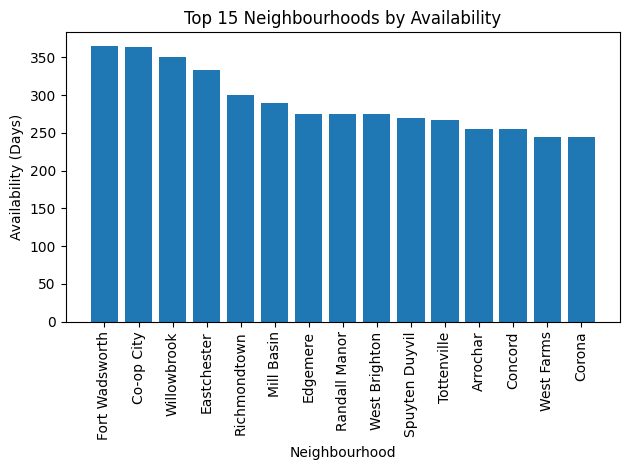

In [30]:
neighbourhood_availability = df.groupby('neighbourhood')['availability_365'].mean()

top_neighbourhoods = neighbourhood_availability.nlargest(15)

plt.bar(top_neighbourhoods.index, top_neighbourhoods.values)
plt.xlabel('Neighbourhood')
plt.ylabel('Availability (Days)')
plt.title('Top 15 Neighbourhoods by Availability')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

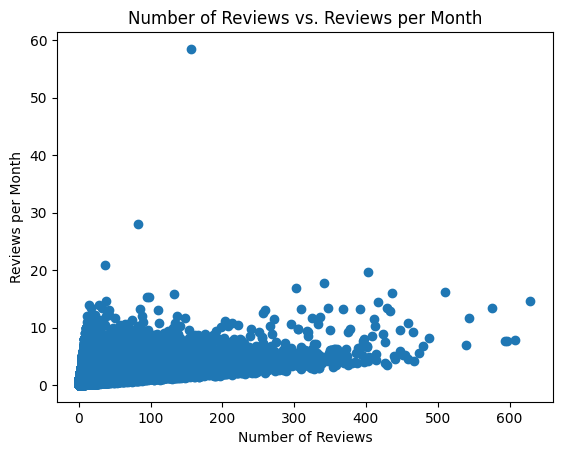

In [31]:
temp=df[df['reviews_per_month']!=0]

plt.scatter(temp['number_of_reviews'], temp['reviews_per_month'])
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews per Month')
plt.title('Number of Reviews vs. Reviews per Month')
plt.show()


In [32]:
df

,id,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Clean & quiet apt home by the park,2787,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,0.00,2,9,0,1,0,0,1,0,0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Bushwick,40.70184,-73.93317,40,4,0,0.00,2,36,0,1,0,0,1,0,0,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Harlem,40.81475,-73.94867,115,10,0,0.00,1,27,1,0,0,0,0,1,0,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Hell's Kitchen,40.75751,-73.99112,55,1,0,0.00,6,2,0,0,1,0,0,1,0,0


In [33]:
bg=df['neighbourhood'].value_counts()
bg=bg.head(10)

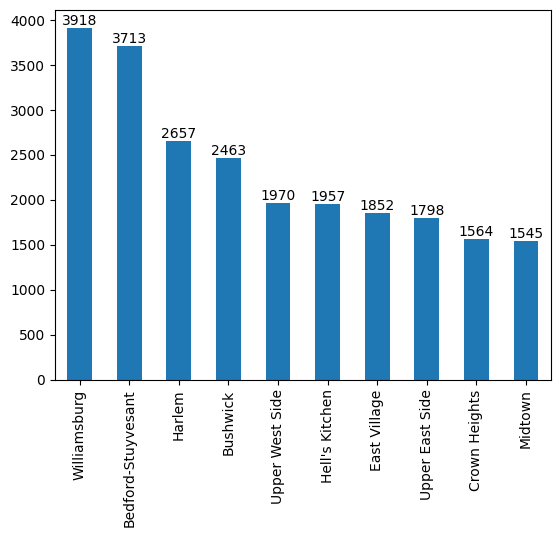

In [34]:
ax=bg.plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

In [35]:
plt.show()

In [36]:
df.drop(['id','name','host_id','neighbourhood'],axis=1,inplace=True)

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load your dataset, assuming 'X' is the feature matrix and 'y' is the target vector
# For example:
# X = pd.read_csv('your_dataset.csv')
X=df;
# y = X['target_column']
Y=X["price"]
# X.drop('target_column', axis=1, inplace=True)

# Create a linear regression model (or any other model of your choice)
model = LinearRegression()

# Specify the number of features you want to retain after RFE
num_features_to_select = 10

# Create the RFE object with the linear regression model and number of features to select
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit the RFE object on your data to perform feature selection
rfe.fit(X, Y)

# Get the selected features
selected_features = X.columns[rfe.support_]

print("Selected features:")
print(selected_features)


Selected features:
Index(['latitude', 'longitude', 'price', 'room_type_Entire home/apt',
       'room_type_Private room', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island'],
      dtype='object')


In [38]:
data=df

In [39]:
X = data.drop('price', axis=1)
y = data['price']

num_features_to_select = 12

scaler = StandardScaler()

# Fit and transform the feature matrix X
X_scaled = scaler.fit_transform(X)

model = LinearRegression()

# Create the RFE object with the linear regression model and number of features to select
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit the RFE object on your data to perform feature selection
X_selected = rfe.fit_transform(X, y)

# Get the selected features' column names
selected_features = X.columns[rfe.support_]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 71.1671751674056
Mean Squared Error (MSE): 31891.90801057463
Root Mean Squared Error (RMSE): 178.58305633674945


In [40]:
print(df['price'].min())
print(df['price'].max())

0
10000


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           48879 non-null  float64
 1   longitude                          48879 non-null  float64
 2   price                              48879 non-null  int64  
 3   minimum_nights                     48879 non-null  int64  
 4   number_of_reviews                  48879 non-null  int64  
 5   reviews_per_month                  48879 non-null  float64
 6   calculated_host_listings_count     48879 non-null  int64  
 7   availability_365                   48879 non-null  int64  
 8   room_type_Entire home/apt          48879 non-null  uint8  
 9   room_type_Private room             48879 non-null  uint8  
 10  room_type_Shared room              48879 non-null  uint8  
 11  neighbourhood_group_Bronx          48879 non-null  uin

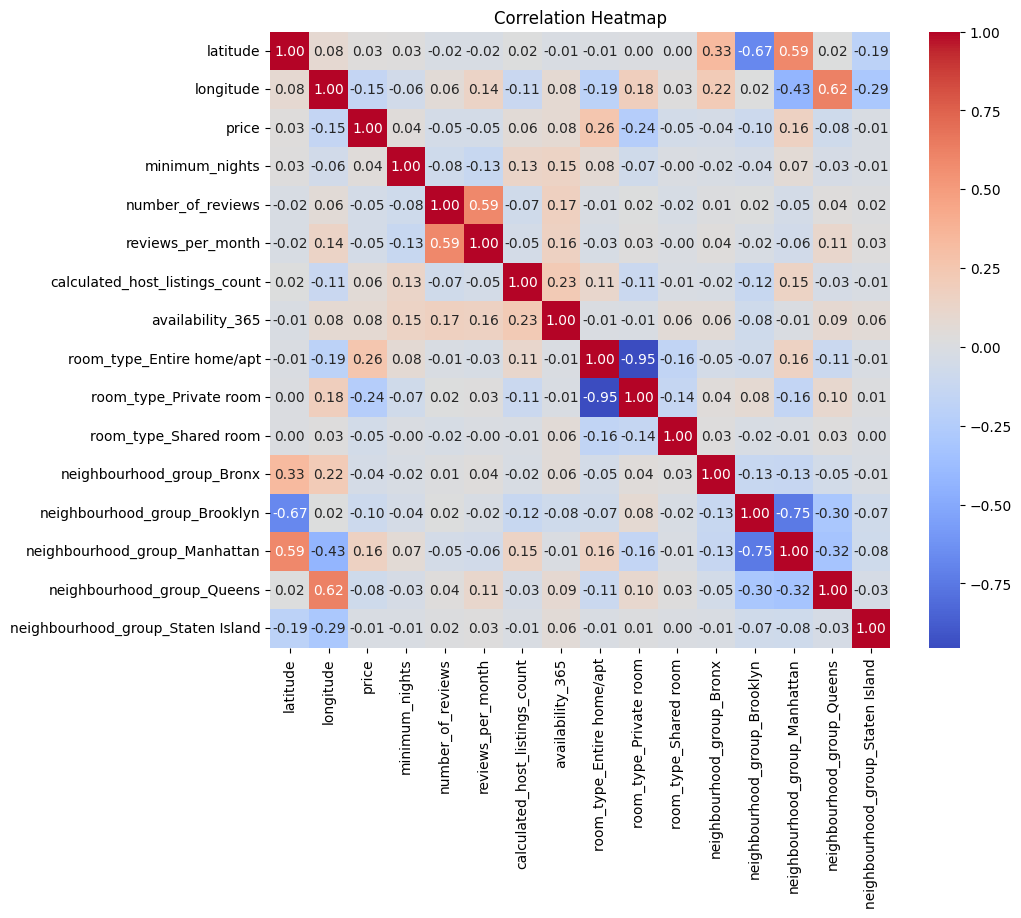

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation between 'price' and other numerical features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [47]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
count,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000
mean,40.728945,-73.952168,152.722355,7.011027,23.281205,1.091248,7.145891,112.788989,0.519691,0.456597,0.023712,0.022300,0.411179,0.442971,0.115919,0.007631
std,0.054529,0.046160,240.186804,20.016000,44.556149,1.597433,32.957738,131.613322,0.499617,0.498118,0.152151,0.147659,0.492053,0.496742,0.320131,0.087023
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.723080,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.763110,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
